Stock Prediction :
Take stock price of any company you
want and predicts its price by using LSTM. Use only Jupyter notebook code.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

### Load the historical stock price data

In [6]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1420070400&period2=1654080000&interval=1d&events=history')

### Select the 'Close' column as the target variable

In [7]:
data = df.filter(['Close']).values

### Scale the data


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

### Split the data into training and testing sets


In [9]:
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

### Convert the data into sequences


In [10]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [11]:
seq_length = 60  # Length of the input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

### Build the LSTM model


In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


### Compile the model

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


### Train the model


In [14]:
model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
45/45 [==============================] - 6s 44ms/step - loss: 0.0069
Epoch 2/100
45/45 [==============================] - 2s 42ms/step - loss: 3.1449e-04
Epoch 3/100
45/45 [==============================] - 2s 44ms/step - loss: 2.9291e-04
Epoch 4/100
45/45 [==============================] - 2s 43ms/step - loss: 2.7981e-04
Epoch 5/100
45/45 [==============================] - 2s 47ms/step - loss: 2.8874e-04
Epoch 6/100
45/45 [==============================] - 2s 49ms/step - loss: 2.9708e-04
Epoch 7/100
45/45 [==============================] - 2s 53ms/step - loss: 2.5774e-04
Epoch 8/100
45/45 [==============================] - 2s 54ms/step - loss: 2.5679e-04
Epoch 9/100
45/45 [==============================] - 2s 54ms/step - loss: 2.3524e-04
Epoch 10/100
45/45 [==============================] - 2s 54ms/step - loss: 2.4011e-04
Epoch 11/100
45/45 [==============================] - 2s 55ms/step - loss: 2.1546e-04
Epoch 12/100
45/45 [==============================] - 3s 58ms/step 

### Make predictions


In [15]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 2s 24ms/step


# Plot the predicted and actual prices


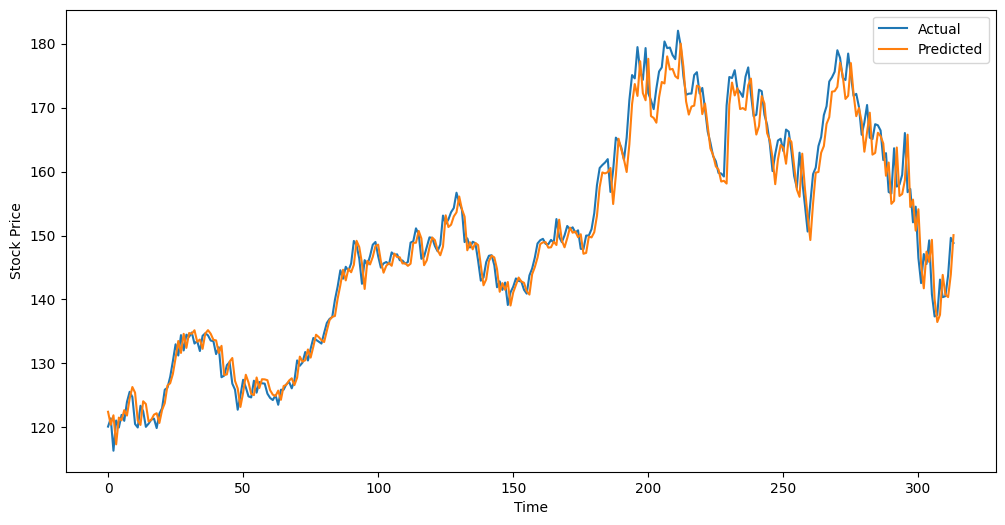

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].values[int(len(df) * 0.8) + seq_length:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
